In [1]:
import tensorflow as tf
from tensorflow.contrib import rnn

import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline

/home/dmpr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/dmpr/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
# configuration variables
input_vec_size = lstm_size = 28
time_step_size = 28

batch_size = 128
test_size = 256

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [4]:
def model(X, W, B, lstm_size):
    # X, input shape: (batch_size, time_step_size, input_vec_size)
    XT = tf.transpose(X, [1, 0, 2])  # permute time_step_size and batch_size
    # XT shape: (time_step_size, batch_size, input_vec_size)
    XR = tf.reshape(XT, [-1, lstm_size]) # each row has input for each lstm cell (lstm_size=input_vec_size)
    # XR shape: (time_step_size * batch_size, input_vec_size)
    X_split = tf.split(XR, time_step_size, 0) # split them to time_step_size (28 arrays)
    # Each array shape: (batch_size, input_vec_size)

    # Make lstm with lstm_size (each input vector size)
    # cell = rnn.BasicLSTMCell(lstm_size, forget_bias=1.0, state_is_tuple=True)

    cell = rnn.BasicRNNCell(lstm_size)

    # Get lstm cell output, time_step_size (28) arrays with lstm_size output: (batch_size, lstm_size)
    outputs, _states = rnn.static_rnn(cell, X_split, dtype=tf.float32)

    # Linear activation
    # Get the last output
    return tf.matmul(outputs[-1], W) + B, cell.state_size # State size to initialize the stat

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28)
teX = teX.reshape(-1, 28, 28)

X = tf.placeholder("float", [None, 28, 28])
Y = tf.placeholder("float", [None, 10])

# get lstm_size and output 10 labels
W = init_weights([lstm_size, 10])
B = init_weights([10])

py_x, state_size = model(X, W, B, lstm_size)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

session_conf = tf.ConfigProto()
session_conf.gpu_options.allow_growth = True

In [7]:
# Launch the graph in a session
with tf.Session(config=session_conf) as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(10):
        for start, end in zip(range(0, len(trX), batch_size), range(batch_size, len(trX)+1, batch_size)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})

        test_indices = np.arange(len(teX))  # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
            sess.run(predict_op, feed_dict={X: teX[test_indices]})))

0 0.42578125
1 0.546875
2 0.59765625
3 0.66015625
4 0.703125
5 0.73046875
6 0.7578125
7 0.828125
8 0.77734375
9 0.76953125


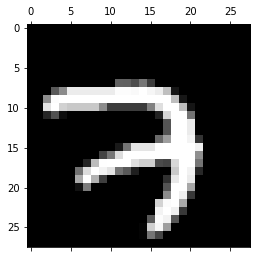

In [8]:
plt.matshow(np.reshape(trX[0], (28,28)), cmap=plt.get_cmap('gray'))

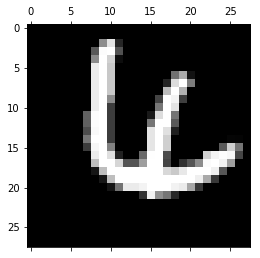

In [20]:
XT = np.reshape(XT, [-1, lstm_size])
XT.shape
plt.matshow(XT, cmap=plt.get_cmap('gray'))
X_split = np.split(XT, time_step_size, 0)

/home/dmpr/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


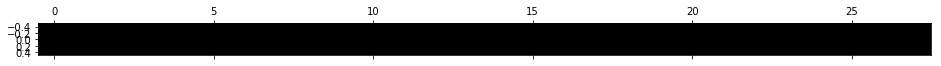

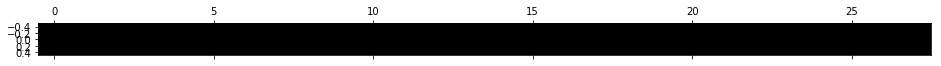

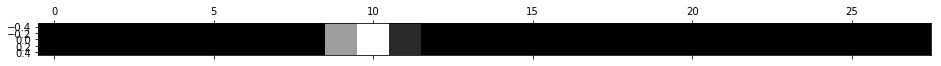

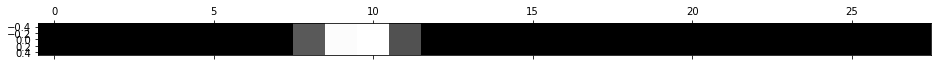

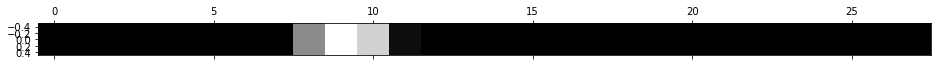

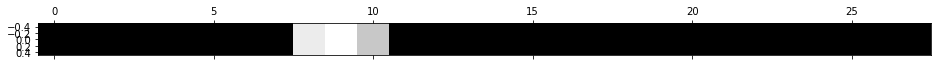

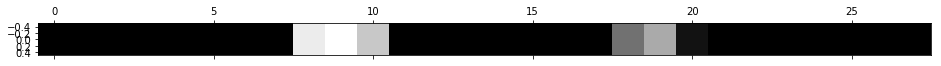

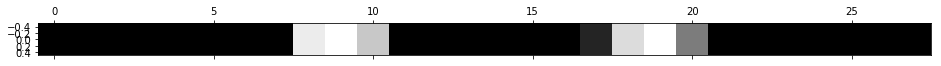

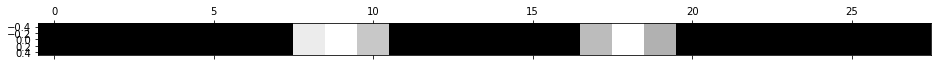

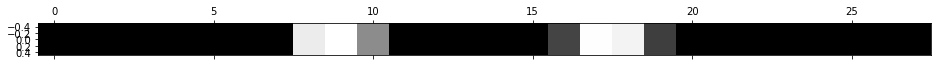

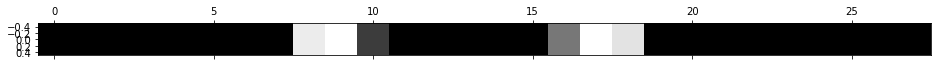

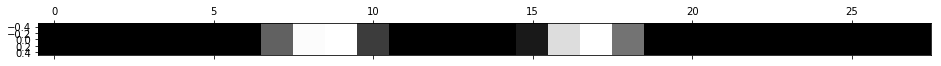

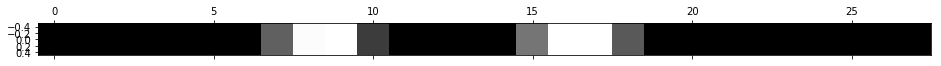

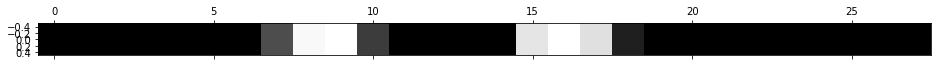

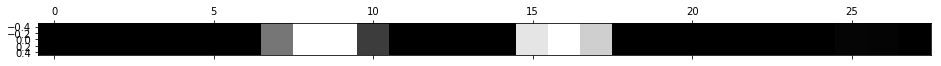

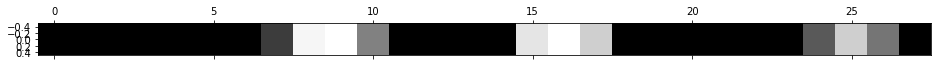

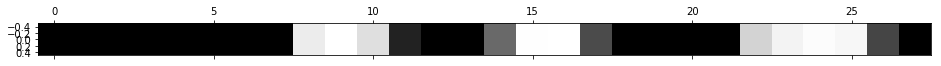

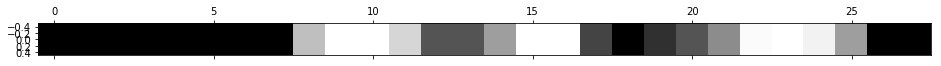

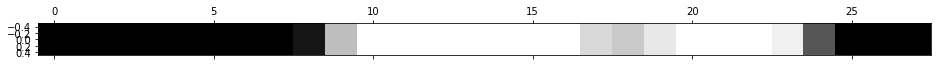

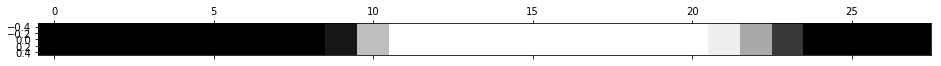

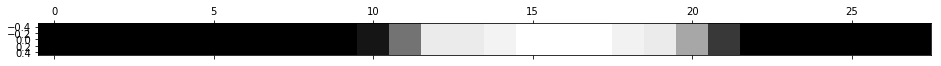

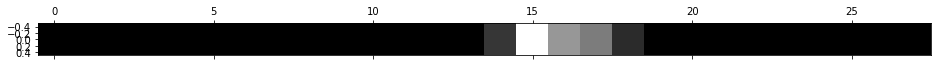

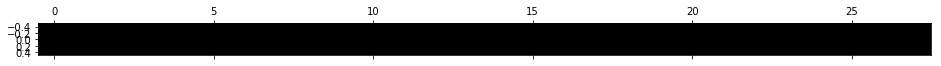

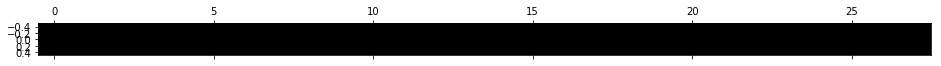

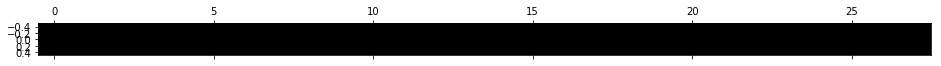

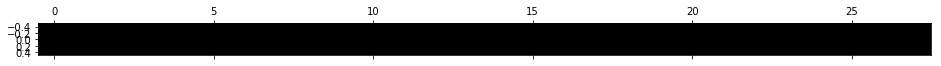

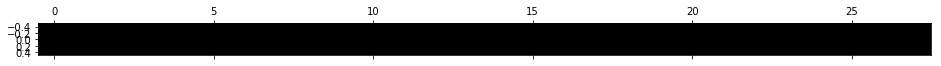

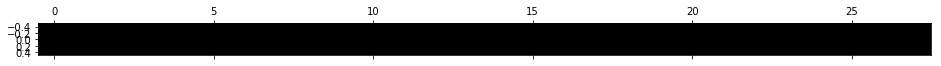

In [19]:
for x in X_split:
    plt.matshow(x, cmap=plt.get_cmap('gray'))